Accuracy: 0.9854545454545455
Confusion Matrix:
 [[148   0]
 [  4 123]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       148
           1       1.00      0.97      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



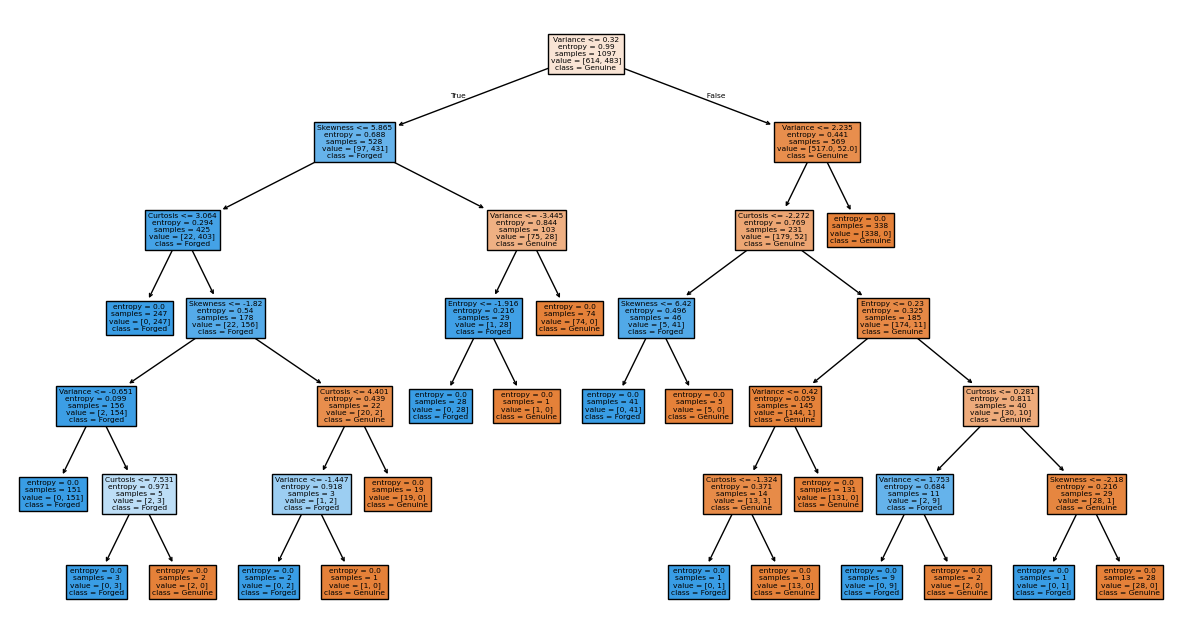

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load dataset (replace with your CSV file path)
df = pd.read_csv(r"banknotes.csv")  
# Columns: Variance, Skewness, Curtosis, Entropy, Class

# Features and target
X = df[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = df['Class']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(model, feature_names=['Variance','Skewness','Curtosis','Entropy'],
          class_names=['Genuine','Forged'], filled=True)
plt.show()


In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Different SVM kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = {}

for kernel in kernels:
    model = SVC(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies[kernel] = acc

    print(f"\nKernel: {kernel}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names,zero_division=0))

# Example prediction (sepal length, sepal width, petal length, petal width)
sample = [[5.1, 3.5, 1.4, 0.2]]   # should be Iris-setosa
best_kernel = max(accuracies, key=accuracies.get)
best_model = SVC(kernel=best_kernel, gamma='scale')
best_model.fit(X_train, y_train)
prediction = best_model.predict(sample)

print(f"\nBest Kernel: {best_kernel}")
print("Prediction for sample [5.1, 3.5, 1.4, 0.2]:", target_names[prediction[0]])



Kernel: linear
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Kernel: poly
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Kernel: rbf
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00   

In [7]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build KNN model (k=5 by default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# Example prediction
sample = [[5.1, 3.5, 1.4, 0.2]]  # should be Setosa
prediction = knn.predict(sample)
print("Prediction for sample [5.1, 3.5, 1.4, 0.2]:", target_names[prediction[0]])


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Prediction for sample [5.1, 3.5, 1.4, 0.2]: setosa
